In [433]:
#importamos las librerias necesarias
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist
from nltk.corpus import stopwords

Analisis sobre los datos del curso Coursera

In [434]:
df_coursera_curso = pd.read_csv(r'Datasets\Coursera_courses.csv')

In [435]:
df_coursera_curso.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [436]:
df_coursera_curso.shape

(623, 4)

In [437]:
df_coursera_curso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [438]:
df_coursera_curso.duplicated().sum()

0

Consultamos el total de instituciones

In [439]:
df_coursera_curso['institution'].value_counts()

University of Pennsylvania       43
University of Michigan           31
Duke University                  24
Google Cloud                     22
IBM                              18
                                 ..
EDHEC Business School             1
INSEAD                            1
Google - Spectrum Sharing         1
New York Institute of Finance     1
UCL School of Management          1
Name: institution, Length: 134, dtype: int64

Creamos un dataframe que contenga la institución y la cantidad de tiempo repetido

In [440]:
value_counts = df_coursera_curso['institution'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['institution', 'counts']

In [441]:
df_value_counts_reset

,institution,counts
0,University of Pennsylvania,43
1,University of Michigan,31
2,Duke University,24
3,Google Cloud,22
4,IBM,18
...,...,...
129,EDHEC Business School,1
130,INSEAD,1
131,Google - Spectrum Sharing,1
132,New York Institute of Finance,1


Verificamos la distribución de cursos por institución

(Concluimos que La cantidad media de instituciones ofrece menos de 10 cursos)

Text(0, 0.5, 'Cantidad de cursos')

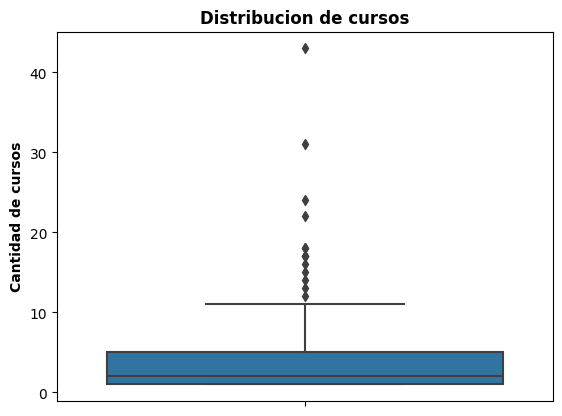

In [442]:
sns.boxplot(data=df_value_counts_reset, y='counts')
plt.title('Distribucion de cursos', weight='bold')
plt.ylabel('Cantidad de cursos', weight='bold')

Las 10 instituciones más populares

Text(0, 0.5, 'Institucion')

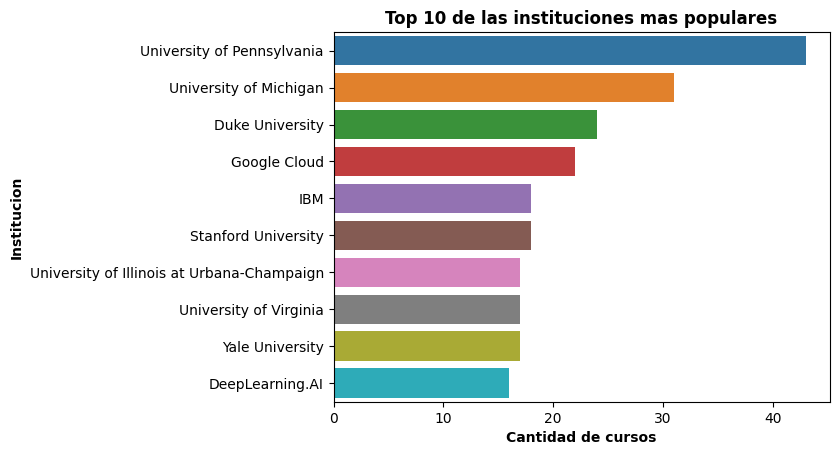

In [443]:
sns.barplot(data=df_value_counts_reset.head(10), y='institution', x='counts')
plt.title('Top 10 de las instituciones mas populares', weight='bold')
plt.xlabel('Cantidad de cursos', weight='bold')
plt.ylabel('Institucion', weight='bold')

Obtenemos el rating de los cursos del dataset review

In [444]:
df_coursera_reviews = pd.read_csv(r'Datasets\Coursera_reviews.csv')

In [445]:
df_coursera_reviews.drop_duplicates(inplace=True)

In [446]:
df_coursera_reviews.duplicated().sum()

0

In [447]:
df_coursera_curso = df_coursera_curso.join(df_coursera_reviews.groupby('course_id').mean().round(1), on='course_id', how='left')

C:\Users\cacer\AppData\Local\Temp\ipykernel_2432\39851407.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_coursera_curso = df_coursera_curso.join(df_coursera_reviews.groupby('course_id').mean().round(1), on='course_id', how='left')


In [448]:
df_coursera_curso.head()

,name,institution,course_url,course_id,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.7
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.8
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.9
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.8
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.8


In [449]:
df_coursera_curso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         623 non-null    object 
 1   institution  623 non-null    object 
 2   course_url   623 non-null    object 
 3   course_id    623 non-null    object 
 4   rating       604 non-null    float64
dtypes: float64(1), object(4)
memory usage: 24.5+ KB


Creamos un nuevo dataframe con el rating

In [450]:
df_coursera_curso.to_csv(r'Datasets/coursera.csv', index=False)

In [451]:
df_coursera_curso= df_coursera_curso.sort_values(by='rating', ascending=False)

In [452]:
df_coursera_curso.head()

,name,institution,course_url,course_id,rating
361,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,https://www.coursera.org/learn/legaltech,legaltech,5.0
106,Entreprise et changement climatique,ESSEC Business School,https://www.coursera.org/learn/entreprise-chan...,entreprise-changement-climatique,5.0
298,Bugs 101: Insect-Human Interactions,University of Alberta,https://www.coursera.org/learn/bugs-101,bugs-101,5.0
500,Building Modern Python Applications on AWS,Amazon Web Services,https://www.coursera.org/learn/building-modern...,building-modern-python-applications-on-aws,5.0
494,Build a Modern Computer from First Principles:...,Hebrew University of Jerusalem,https://www.coursera.org/learn/nand2tetris2,nand2tetris2,5.0


In [453]:
df_coursera_curso.describe()

,rating
count,604.000000
mean,4.619868
std,0.395626
min,1.000000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


Verificamos la distribucion por rating

(la media del rating esta entre 4.5 y 4.7. Concluimos con que la gente esta satisfecha con los cursos)

Text(0, 0.5, 'Rating')

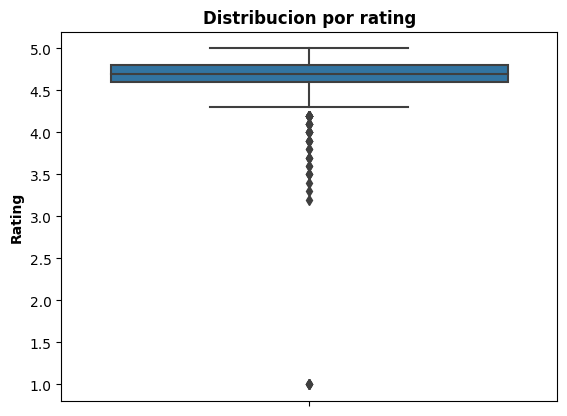

In [454]:
sns.boxplot(data=df_coursera_curso, y='rating')
plt.title('Distribucion por rating', weight='bold')
plt.ylabel('Rating', weight='bold')

Top 20 de las mejores instituciones según el rating

In [455]:
df_aux = df_coursera_curso.groupby('institution').mean().round(1)

C:\Users\cacer\AppData\Local\Temp\ipykernel_2432\4261517619.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aux = df_coursera_curso.groupby('institution').mean().round(1)


In [456]:
df_aux.sort_values(by='rating', ascending=False, inplace=True)

In [457]:
df_aux.reset_index(inplace=True)

Text(0, 0.5, 'Institucion')

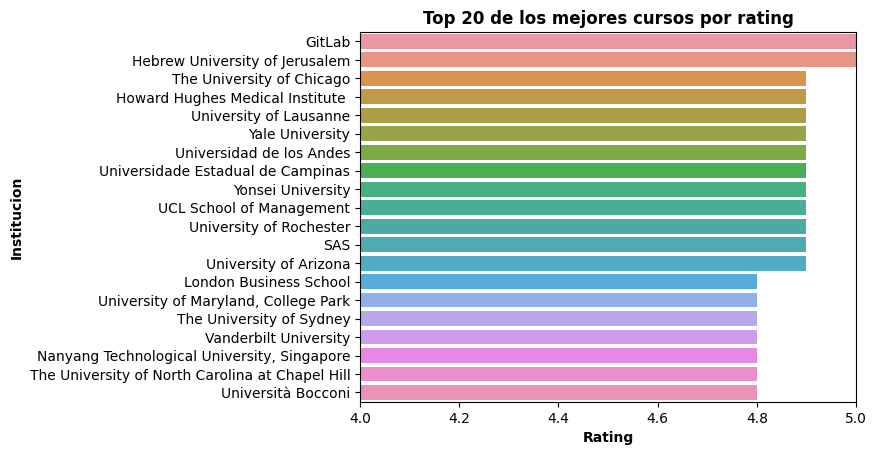

In [458]:
sns.barplot(data=df_aux.head(20), y='institution', x='rating')
plt.xlim(4, 5)
plt.title('Top 20 de los mejores cursos por rating', weight='bold')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Institucion', weight='bold')

Creamos una nube de palabras

In [459]:
"""este código toma los nombres de los cursos de Coursera, los divide en palabras individuales y realiza un filtrado 
para eliminar las palabras vacías en inglés (stopwords).El resultado final es una lista de palabras relevantes 
para generar una nube de palabras"""

'este código toma los nombres de los cursos de Coursera, los divide en palabras individuales y realiza un filtrado \npara eliminar las palabras vacías en inglés (stopwords).El resultado final es una lista de palabras relevantes \npara generar una nube de palabras'

In [460]:
# se extraen los nombres de los cursos
title = df_coursera_curso['name'].to_list()
# se dividen los nombres de los cursos en palabras individuales utilizando el espacio como separador 
title_word = [word.split(' ') for word in title]
# se crea una lista plana de todas las palabras extraídas de los nombres de los cursos
title_word = [word for word_list in title_word for word in word_list]

In [461]:
# Se crea una lista llamada token0 para almacenar las palabras que tienen una longitud mayor o igual a 3 caracteres
# y se convierten a minúsculas
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())

In [462]:
#Se descargan las stopwords
nltk.download("stopwords")
#Se crea un conjunto de stopwords en inglés
stopwords_a=set(stopwords.words('english'))
#se crea una lista llamada token1 que contiene todas las palabras de token0 que no están en el conjunto de stopwords
token1 = [word for word in token0 if word not in stopwords_a]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cacer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Obtenga la frecuencia de cada palabra 

In [463]:
fdist = FreqDist(token1)
fdist

FreqDist({'introduction': 89, 'data': 48, 'python': 27, 'management': 26, 'fundamentals': 26, 'science': 21, 'learning': 21, 'health': 18, 'business': 17, 'international': 17, ...})

Creamos un nuevo dataframe para almacenar la palabra y la frecuencia

In [464]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,abogado,1
1,del,3
2,futuro:,1
3,legaltech,1
4,transformación,1


In [465]:
df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

Aplicar Stemming

In [466]:
#El código realiza el proceso de stemming (obtención de la raíz de las palabras) en el DataFrame df_title_new

In [467]:
stemmer = PorterStemmer()

In [468]:
#Creamos una lista vacía para almacenar los títulos con las palabras reducidas a su raíz
title_list=[]
#Iteramos sobre cada título en la columna "Word" del DataFrame df_title_new
for tit in df_title_new['Word']:
   # utilizamos tokenize para separar las palabras en una lista:
    tit=nltk.word_tokenize(tit)
        
    # obtenemos la raiz de la palabra
    tit=[stemmer.stem(word) for word in tit]
    # unimos por el titulo otra vez
    tit=" ".join(tit)
    
    # se agrega el título procesado con las palabras reducidas a su raíz a la lista 
    title_list.append(tit)

In [469]:
#Se agrega una nueva columna al dataframe que contiene los titulos procesados con las palabras reducidas
df_title_new['word_stem'] = title_list

In [470]:
df_title_new


,Word,Frequency,word_stem
0,introduction,89,introduct
1,data,48,data
2,python,27,python
3,fundamentals,26,fundament
4,management,26,manag
...,...,...,...
1221,rédaction,1,rédaction
1222,contrats,1,contrat
1223,organizaciones,1,organizacion
1224,efectivas,1,efectiva


Graficamos el Stemming de los títulos con las palabras reducidas a su raíz

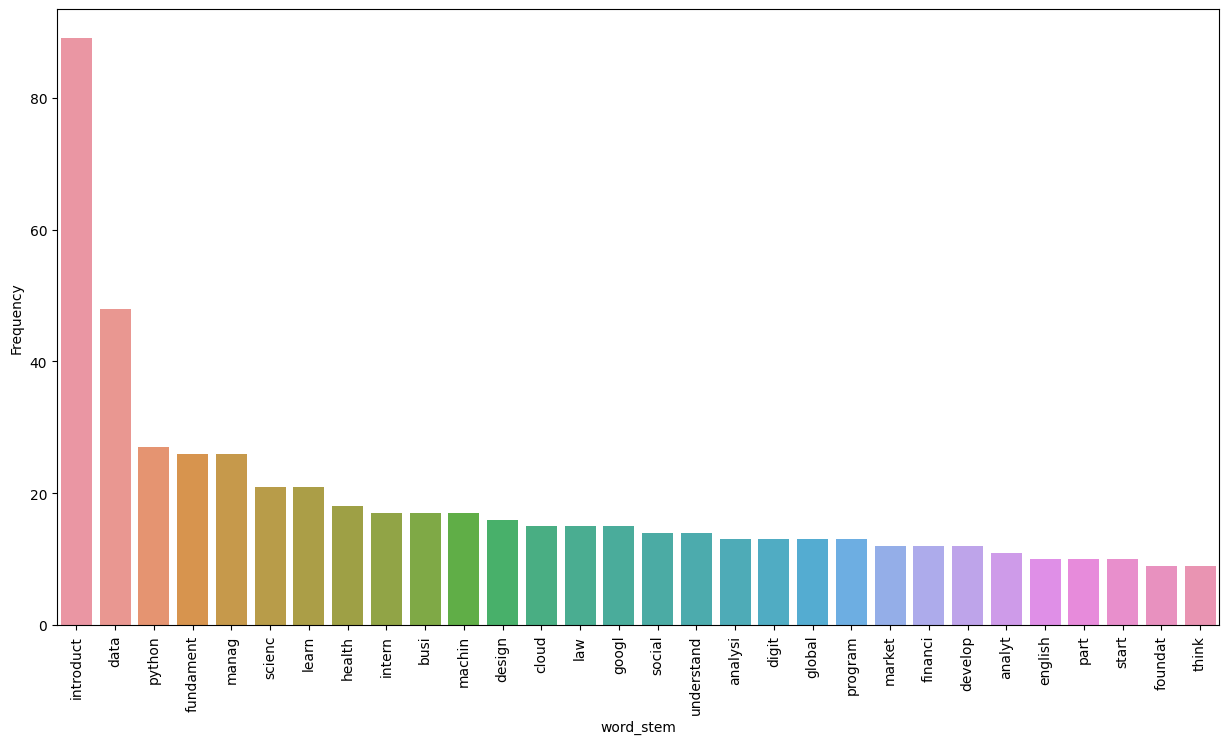

In [471]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()


Cargamos una imagen para dibujar la nube de palabras.

In [472]:
from PIL import Image
mask = np.array(Image.open(r'_src\coursera_logo.png'))

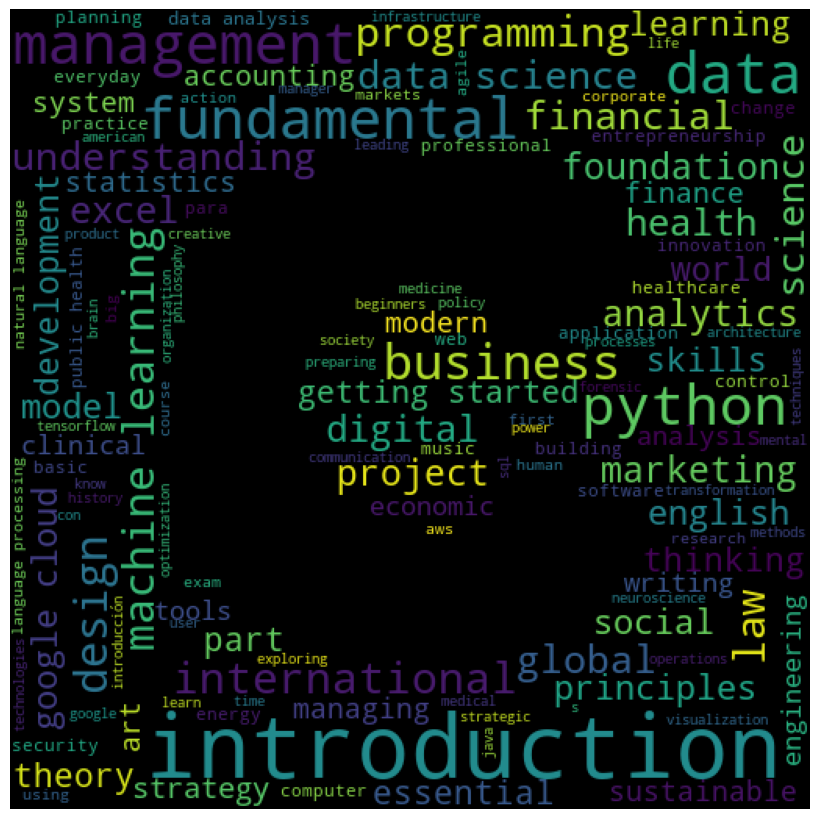

In [473]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(token1)

wordcloud = WordCloud(mask = mask, background_color="black", min_font_size=8, width = mask.shape[1],
               height = mask.shape[0]).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Revisar el dataset Coursera Reviews

In [474]:
df_coursera_reviews = pd.read_csv(r'Datasets\Coursera_reviews.csv')

In [475]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [476]:
df_coursera_reviews.shape

(1454711, 5)

In [477]:
df_coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [478]:
df_coursera_reviews.duplicated().sum()

934764

In [479]:
df_coursera_reviews.drop_duplicates(inplace=True)

Consultamos la cantidad de reviews por curso

In [480]:
df_coursera_reviews['course_id'].value_counts()

python                                                       15226
machine-learning                                             12677
neural-networks-deep-learning                                12292
technical-support-fundamentals                               12055
learning-how-to-learn                                        11871
                                                             ...  
remote-team-management                                           5
social-work-practice-advocating-social-justice-and-change        5
the-business-of-product-management-one                           5
entreprise-changement-climatique                                 2
building-modern-python-applications-on-aws                       1
Name: course_id, Length: 604, dtype: int64

Creamos un nuevo dataframe con los reviews por course_id

In [481]:
value_counts = df_coursera_reviews['course_id'].value_counts(dropna=True, sort=True)

In [482]:
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['technologies', 'counts']

In [483]:
df_value_counts_reset.head()

,technologies,counts
0,python,15226
1,machine-learning,12677
2,neural-networks-deep-learning,12292
3,technical-support-fundamentals,12055
4,learning-how-to-learn,11871


In [484]:
df_value_counts_reset.shape

(604, 2)

Graficamos las 10 tecnologías más populares

Text(0, 0.5, 'Tecnologias')

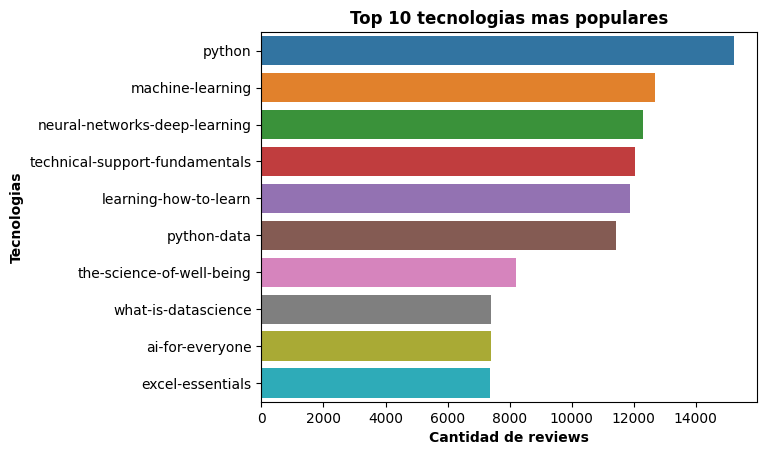

In [485]:
sns.barplot(data=df_value_counts_reset.head(10), y='technologies', x='counts')
plt.title('Top 10 tecnologias mas populares', weight='bold')
plt.xlabel('Cantidad de reviews', weight='bold')
plt.ylabel('Tecnologias', weight='bold')

Analisis sobre los datos de los cursos en Edx

In [486]:
df_edx_curso = pd.read_csv(r'Datasets\edx_courses.csv')

In [487]:
df_edx_curso.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [488]:
df_edx_curso.shape

(975, 16)

In [489]:
df_edx_curso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Verificamos los valores duplicados

In [490]:
df_edx_curso.duplicated().sum()

1

In [491]:
df_edx_curso.drop_duplicates(inplace=True)

Creamos una columna de precio numérico

In [492]:
#En la función lambda, se utiliza la expresión regular r'[$]\d+' para encontrar el patrón de un símbolo de dólar seguido de uno o más 
#dígitos en el valor de la columna 'price'. La función re.findall() devuelve una lista con todas las ocurrencias encontradas.
#Se accede al primer elemento de la lista utilizando el índice [0], ya que se asume que solo hay una coincidencia en cada valor de la columna 'price'.
#Se utiliza replace('$', '') para eliminar el símbolo de dólar del valor obtenido, dejando solo los dígitos que representan el precio.
#El resultado de la función lambda se asigna a una nueva columna llamada 'price in $' en el DataFrame df_edx.
df_edx_curso['price in $'] = df_edx_curso['price'].apply(lambda x: re.findall(r'[$]\d+', x)[0].replace('$', ''))
df_edx_curso.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price in $
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249


Verificamos los valores NaN en las columnas

In [493]:
df_edx_curso['n_enrolled'].isnull().values.sum()

120

In [494]:
df_edx_curso['price in $'].isnull().values.sum()

0

In [495]:
#rellenamos los valores nulos en la columna 'n_enrolled' con ceros utilizando el método fillna()
df_edx_curso['n_enrolled'].fillna(0, inplace=True)

In [496]:
#la función lambda reemplaza las comas en los valores con una cadena vacía
df_edx_curso['n_enrolled'] = df_edx_curso['n_enrolled'].apply(lambda x: str(x).replace(',', ''))

In [497]:
#convertimos los valores de la columna 'n_enrolled' a enteros.
df_edx_curso['n_enrolled'] = df_edx_curso['n_enrolled'].astype(int)

In [498]:
#convertimos los valores de la columna 'price in $' a enteros.
df_edx_curso['price in $'] = df_edx_curso['price in $'].astype(int)

In [499]:
#se crea un DataFrame auxiliar llamado df_aux que contiene los datos de df_edx ordenados por la columna 'n_enrolled' de manera descendente
df_aux = df_edx_curso.sort_values(by='n_enrolled', ascending=False)

Graficamos los 10 mejores cursos populares y precios

(Concluimos que los cursos más populares no son los más baratos.)

Text(0, 0.5, 'Titulo')

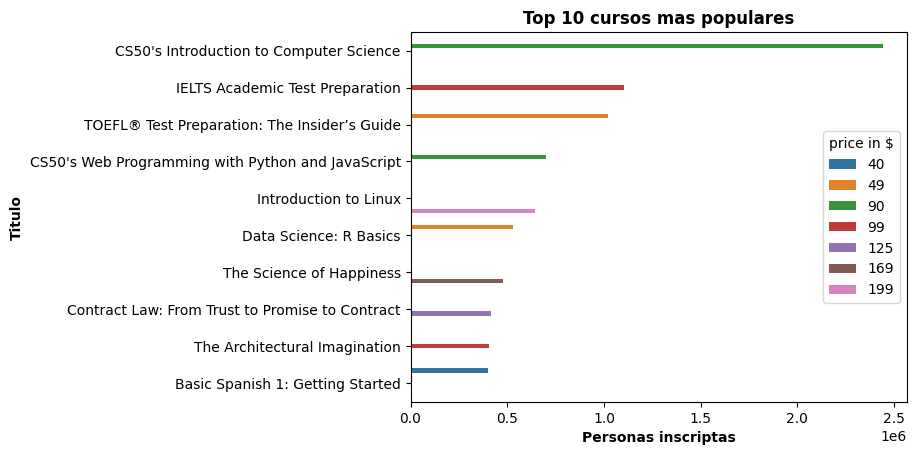

In [500]:
sns.barplot(data=df_aux.head(10), y='title', x='n_enrolled', hue='price in $')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Verificamos los diferentes idiomas de los cursos.

In [501]:
df_aux['language'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
Deutsch            1
اللغة العربية      1
Name: language, dtype: int64

Graficamos los 10 cursos más populares por idioma 

(Concluimos que los 10 mejores cursos son en inglés.)

Text(0, 0.5, 'Titulo')

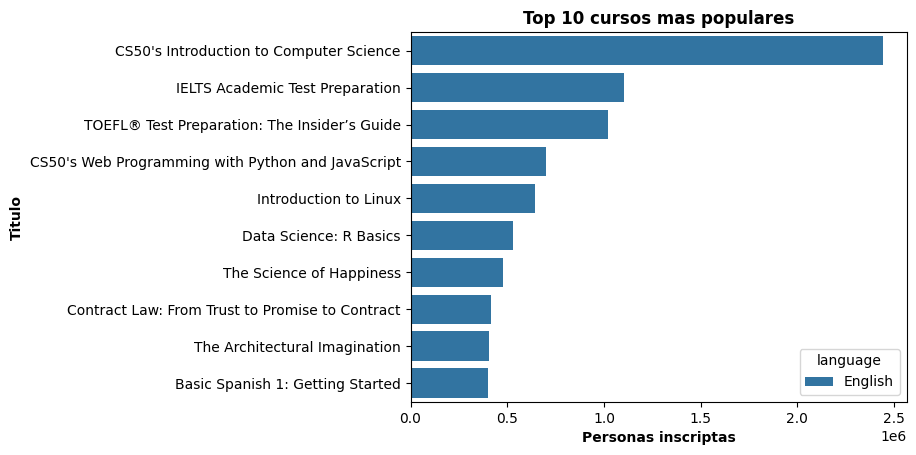

In [502]:
sns.barplot(data=df_aux.head(10), y='title', x='n_enrolled', hue='language')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Graficamos los 10 cursos más populares por nivel

Text(0, 0.5, 'Titulo')

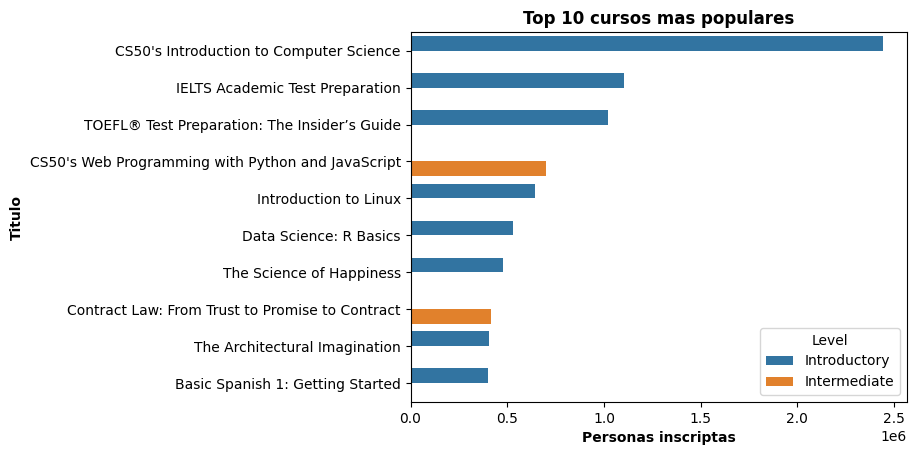

In [503]:
sns.barplot(data=df_aux.head(10), y='title', x='n_enrolled', hue='Level')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Tipo de materia que consume el usuario.

(Concluimos que la materia más demandada de los cursos es informática)

In [504]:
df_edx_aux = df_edx_curso['subject'].value_counts(ascending=False)

Text(0, 0.5, 'Materia')

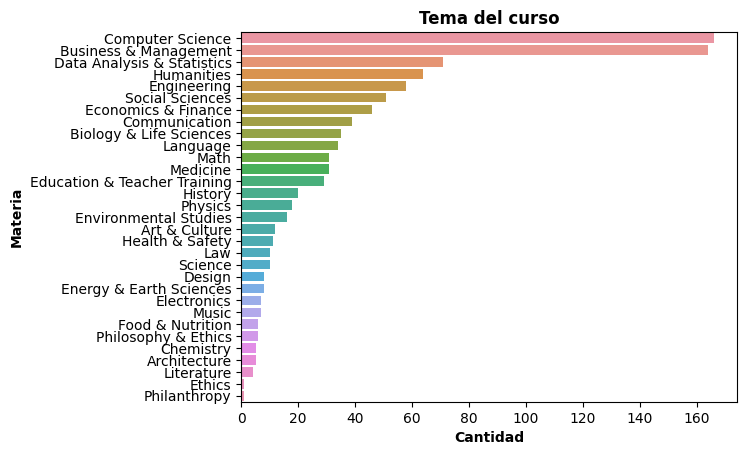

In [505]:
sns.countplot(data=df_edx_curso, y='subject', order=df_edx_curso['subject'].value_counts().index)
plt.title('Tema del curso', weight='bold')
plt.xlabel('Cantidad', weight='bold')
plt.ylabel('Materia', weight='bold')

Creamos una nube de palabras con el título

In [506]:
"""este código toma los títulos de los cursos del DataFrame df_edx, los divide en palabras individuales y realiza un filtrado 
para eliminar las palabras vacías en inglés (stopwords). El resultado final es una lista de palabras relevantes para generar 
una nube de palabras."""

'este código toma los títulos de los cursos del DataFrame df_edx, los divide en palabras individuales y realiza un filtrado \npara eliminar las palabras vacías en inglés (stopwords). El resultado final es una lista de palabras relevantes para generar \nuna nube de palabras.'

In [507]:
#extraemos los títulos de los cursos del DataFrame 
title = df_edx_curso['title'].to_list()

In [508]:
#dividimos los títulos en palabras individuales utilizando el carácter de espacio como separador
title_word = [word.split(' ') for word in title]
#Se crea una lista plana de todas las palabras extraídas de los títulos
title_word = [word for word_list in title_word for word in word_list]
#creamos una lista llamada token0 para almacenar las palabras que tienen una longitud mayor o igual a 3 caracteres y se convierten a minúsculas
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())
#Se crea un conjunto de stopwords en inglés    
stopwords_a=set(stopwords.words('english'))
#creamos una lista llamada token1 que contiene todas las palabras de token0 que no están en el conjunto de stopwords:
token1 = [word for word in token0 if word not in stopwords_a]

Obtenemos la frecuencia de cada palabra en el título.

In [509]:

fdist = FreqDist(token1)
fdist

FreqDist({'introduction': 71, 'data': 55, 'introducción': 41, 'management': 37, 'science': 30, 'business': 28, 'para': 28, 'learning': 26, 'fundamentals': 25, 'part': 23, ...})

Creamos un nuevo dataframe para almacenar la palabra y la frecuencia

In [510]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,learn,1
1,online,5
2,programming,17
3,everybody,1
4,(getting,1


In [511]:

df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

Aplicar Stemming

In [512]:
#El código realiza el proceso de stemming (obtención de la raíz de las palabras) en el DataFrame

In [513]:
stemmer = PorterStemmer()

In [514]:
#Creamos una lista vacía para almacenar los títulos con las palabras reducidas a su raíz
title_list=[]
#Iteramos sobre cada título en la columna "Word" del DataFrame df_title_new
for tit in df_title_new['Word']:
   # utilizamos tokenize para separar las palabras en una lista:
    tit=nltk.word_tokenize(tit)
        
    # obtenemos la raiz de la palabra
    tit=[stemmer.stem(word) for word in tit]
    # unimos por el titulo otra vez
    tit=" ".join(tit)
    
    # se agrega el título procesado con las palabras reducidas a su raíz a la lista 
    title_list.append(tit)

In [515]:
#Se agrega una nueva columna al dataframe que contiene los titulos procesados con las palabras reducidas
df_title_new['word_stem'] = title_list

In [516]:
df_title_new

,Word,Frequency,word_stem
0,introduction,71,introduct
1,data,55,data
2,introducción,41,introducción
3,management,37,manag
4,science,30,scienc
...,...,...,...
1954,person-centered,1,person-cent
1955,counseling:,1,counsel :
1956,well-being,1,well-b
1957,existential,1,existenti


Graficamos el Stemming de los títulos con las palabras reducidas a su raíz

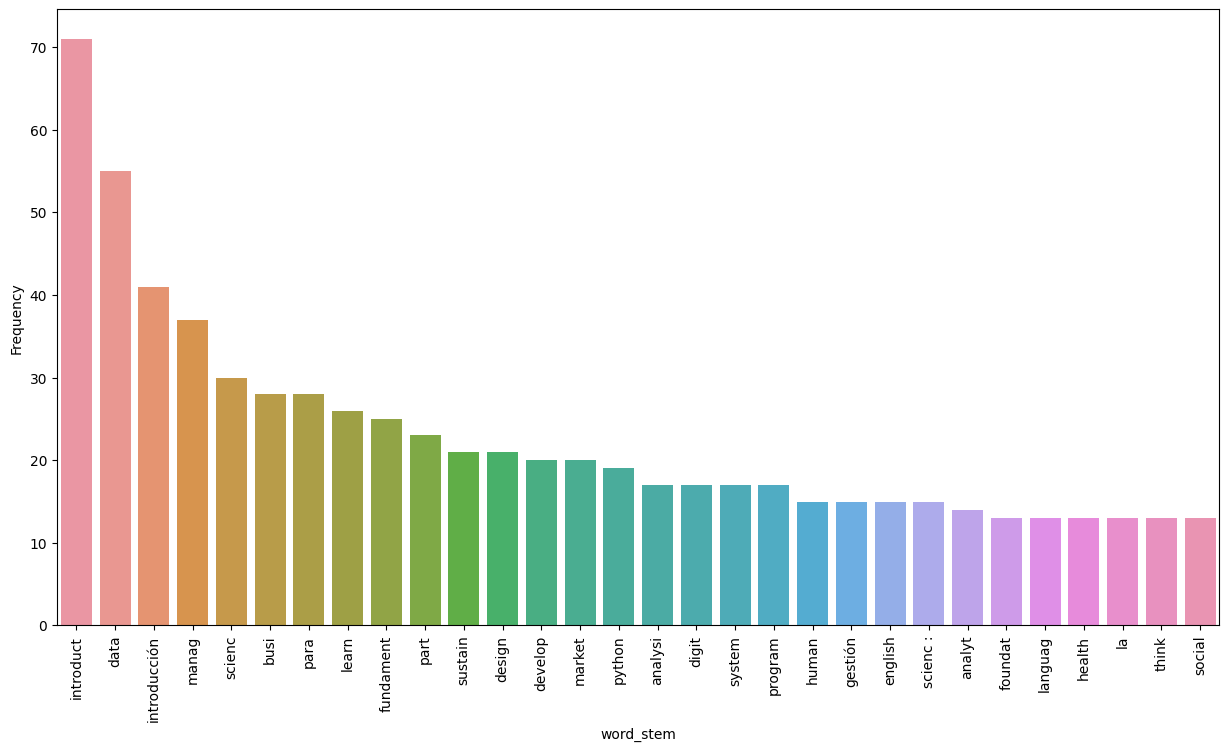

In [517]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Graficamos la nube de palabras

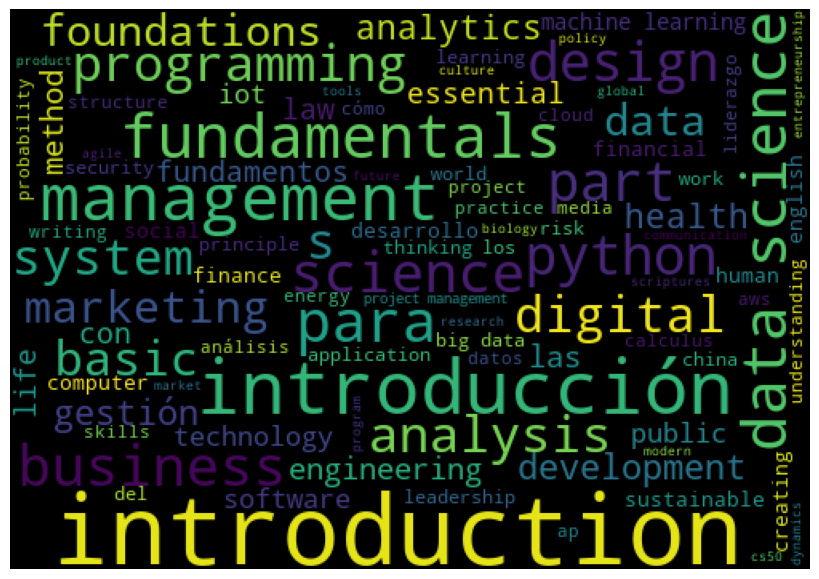

In [518]:
text = " ".join(token1)

wordcloud = WordCloud(background_color="black", min_font_size=8, width=500,
                      height=350).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Analisis al dataset con los cursos de Udemy

Para este caso se ha trabajado con el archivo udemy.csv. Este archivo se ha creado con el archivo udemy_courses.csv y se ha realizado un web scraping utilizando la URL para obtener la calificación y el idioma.

In [519]:
df_udemy = pd.read_csv(r'Datasets\udemy.csv')

In [520]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


In [521]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  language             3678 non-null   object 
 13  rating               3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 377.3+ KB


Verificamos los valores duplicados

In [522]:

df_udemy.duplicated().sum()

6

In [523]:
df_udemy.drop_duplicates(inplace=True)

In [524]:
df_udemy= df_udemy[['course_title', 'is_paid', 'price', 'num_subscribers', 'level',
                    'content_duration', 'published_timestamp', 'subject', 'language', 'rating']]

Extraer año de la columna

In [525]:
#Se utiliza la función pd.to_datetime() para convertir los valores de la columna  en objetos de fecha y hora
df_udemy['year'] = pd.to_datetime(df_udemy['published_timestamp'])

In [526]:
#se utiliza el atributo dt.year para extraer el año de cada objeto de fecha y hora y se asigna a una nueva columna llamada 'year':
df_udemy['year'] = df_udemy['year'].dt.year

In [527]:
df_udemy.head()

,course_title,is_paid,price,num_subscribers,level,content_duration,published_timestamp,subject,language,rating,year
0,Ultimate Investment Banking Course,True,200,2147,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5,2017
2,Financial Modeling for Business Analysts and C...,True,45,2174,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2,2016
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8,2016


Verificamos valores nulos en la columna price

In [528]:
df_udemy['price'].isnull().values.sum()

0

In [529]:
#se crea una copia independiente de df_udemy para realizar operaciones adicionales sin modificar el DataFrame original.
df_aux = df_udemy.copy()

In [530]:
#agregamos una nueva columna en df_aux que muestra los suscriptores en miles en lugar de la cantidad original.
df_aux['subscriber X 1000'] = df_aux['num_subscribers'].apply(lambda x: x/1000 )

Graficar top 10 de mejores cursos y precios

(Concluimos que el curso más popular es gratis.)

In [531]:
df_aux = df_aux.sort_values(by='subscriber X 1000', ascending=False)

Text(0, 0.5, 'Titulo')

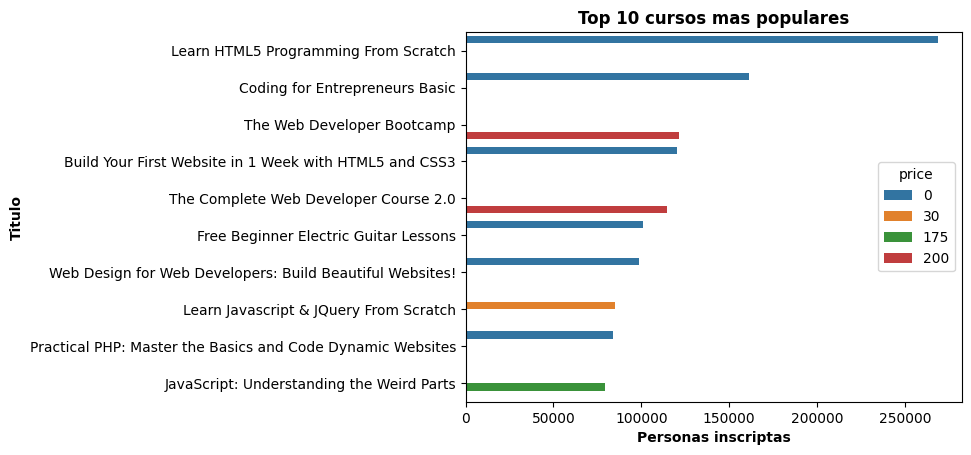

In [532]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='price')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Graficar top 10 de cursos mas populares por idioma

Text(0, 0.5, 'Titulo')

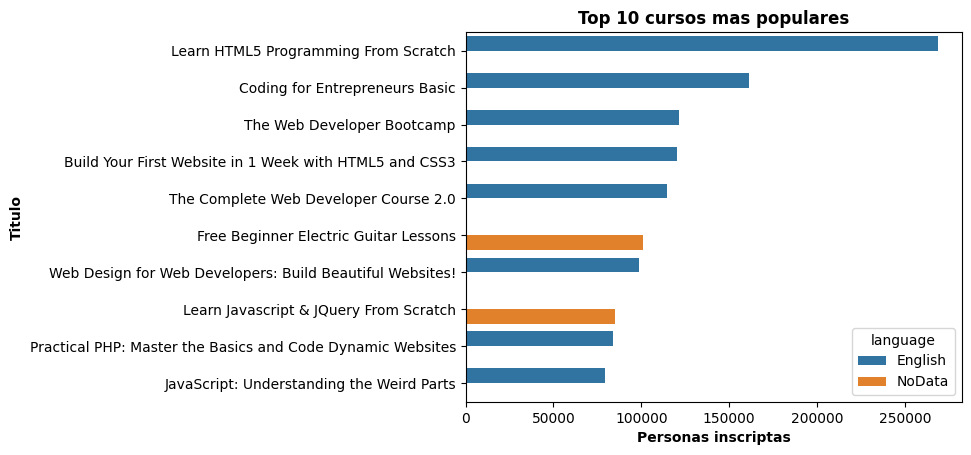

In [533]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='language')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Graficar top 10 de cursos mas populares por nivel

Text(0, 0.5, 'Titulo')

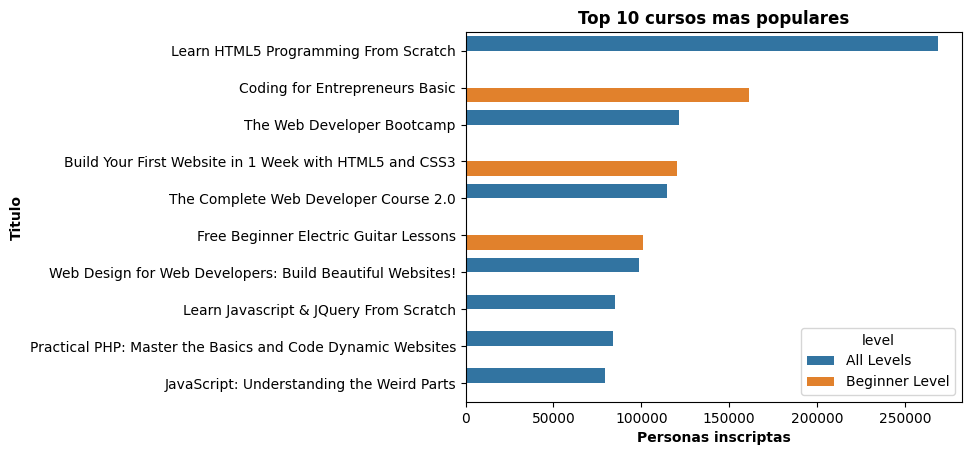

In [534]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='level')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Graficar top 10 de cursos mas populares por rating

Text(0, 0.5, 'Titulo')

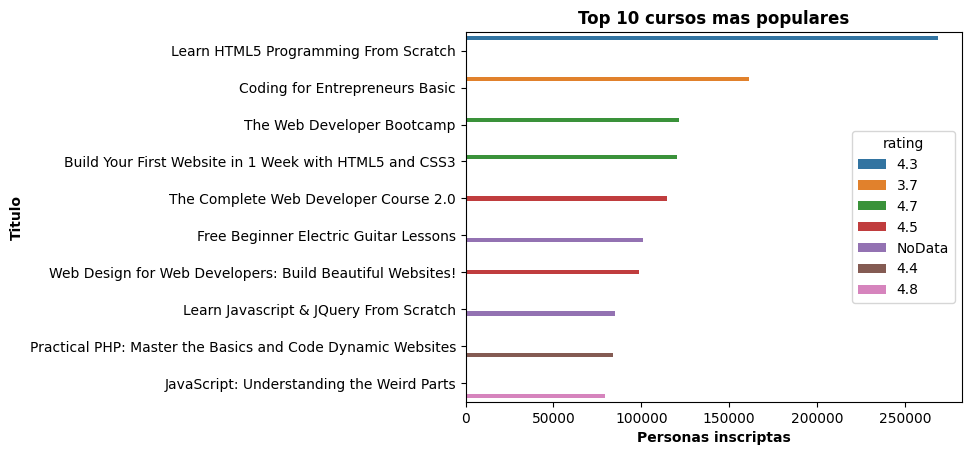

In [535]:

sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='rating')
plt.title('Top 10 cursos mas populares', weight='bold')
plt.xlabel('Personas inscriptas', weight='bold')
plt.ylabel('Titulo', weight='bold')

Tipo de materia que consume el usuario.

Text(0, 0.5, 'Materia')

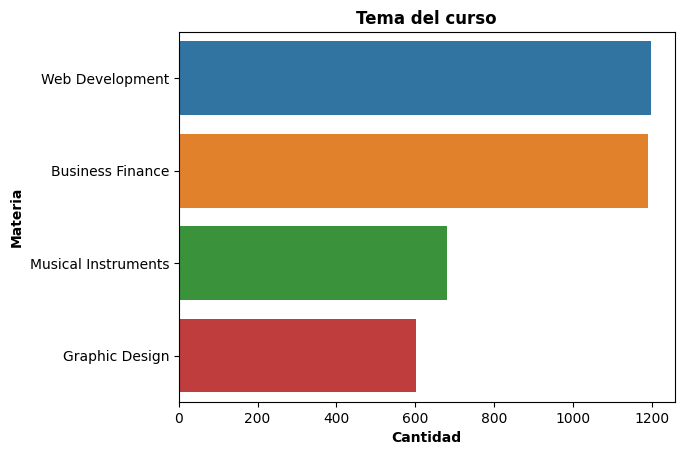

In [536]:
sns.countplot(data=df_udemy, y='subject', order=df_udemy['subject'].value_counts().index)
plt.title('Tema del curso', weight='bold')
plt.xlabel('Cantidad', weight='bold')
plt.ylabel('Materia', weight='bold')

Cantidad de cursos por año

Text(0, 0.5, 'Año')

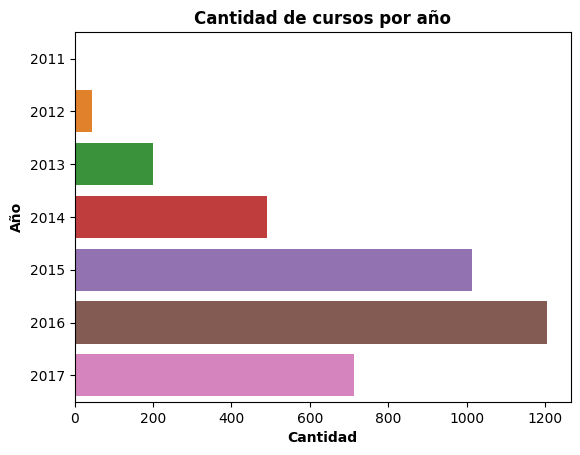

In [537]:
sns.countplot(data=df_udemy, y='year')
plt.title('Cantidad de cursos por año', weight='bold')
plt.xlabel('Cantidad', weight='bold')
plt.ylabel('Año', weight='bold')

GraficarCreamos una nube de palabras con el título

In [538]:
""" este código toma los títulos de los cursos de la columna 'course_title' del DataFrame df_udemy, los divide en palabras individuales
 y realiza un filtrado para eliminar las palabras vacías en inglés (stopwords). 
 El resultado final es una lista de palabras relevantes para generar una nube de palabras."""

" este código toma los títulos de los cursos de la columna 'course_title' del DataFrame df_udemy, los divide en palabras individuales\n y realiza un filtrado para eliminar las palabras vacías en inglés (stopwords). \n El resultado final es una lista de palabras relevantes para generar una nube de palabras."

In [539]:
#extraemos los títulos de los cursos de la columna 'course_title' del DataFrame df_udemy y se guardan en la lista title
title = df_udemy['course_title'].to_list()
#dividemos los títulos en palabras individuales utilizando el carácter de espacio como separador:
title_word = [word.split(' ') for word in title]
#creamos una lista plana de todas las palabras extraídas de los títulos
title_word = [word for word_list in title_word for word in word_list]
#creamos una lista llamada token0 para almacenar las palabras que tienen una longitud mayor o igual a 3 caracteres y se convierten a minúsculas
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())
#creamos un conjunto de stopwords en inglés
stopwords_a=set(stopwords.words('english'))
#cremos una lista llamada token1 que contiene todas las palabras de token0 que no están en el conjunto de stopwords
token1 = [word for word in token0 if word not in stopwords_a]

Obtenemos la frecuencia de cada palabra en el título

In [540]:
fdist = FreqDist(token1)
fdist

FreqDist({'learn': 506, 'trading': 285, 'beginners': 248, 'web': 221, 'course': 203, 'guitar': 203, 'design': 187, 'complete': 186, 'piano': 176, 'build': 170, ...})

Creamos un nuevo dataframe para almacenar la palabra y la frecuencia

In [541]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,ultimate,39
1,investment,22
2,banking,10
3,course,203
4,complete,186


In [542]:

df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

Aplicar Stemming

In [543]:
#Creamos una lista vacía para almacenar los títulos con las palabras reducidas a su raíz
title_list=[]
#Iteramos sobre cada título en la columna "Word" del DataFrame df_title_new
for tit in df_title_new['Word']:
   # utilizamos tokenize para separar las palabras en una lista:
    tit=nltk.word_tokenize(tit)
        
    # obtenemos la raiz de la palabra
    tit=[stemmer.stem(word) for word in tit]
    # unimos por el titulo otra vez
    tit=" ".join(tit)
    
    # se agrega el título procesado con las palabras reducidas a su raíz a la lista 
    title_list.append(tit)

In [544]:
#Se agrega una nueva columna al dataframe que contiene los titulos procesados con las palabras reducidas
df_title_new['word_stem'] = title_list

In [545]:
df_title_new

,Word,Frequency,word_stem
0,learn,506,learn
1,trading,285,trade
2,beginners,248,beginn
3,web,221,web
4,guitar,203,guitar
...,...,...,...
4352,hipster,1,hipster
4353,businessman,1,businessman
4354,pro+,1,pro+
4355,fonts,1,font


Graficamos el Stemming de los títulos con las palabras reducidas a su raíz

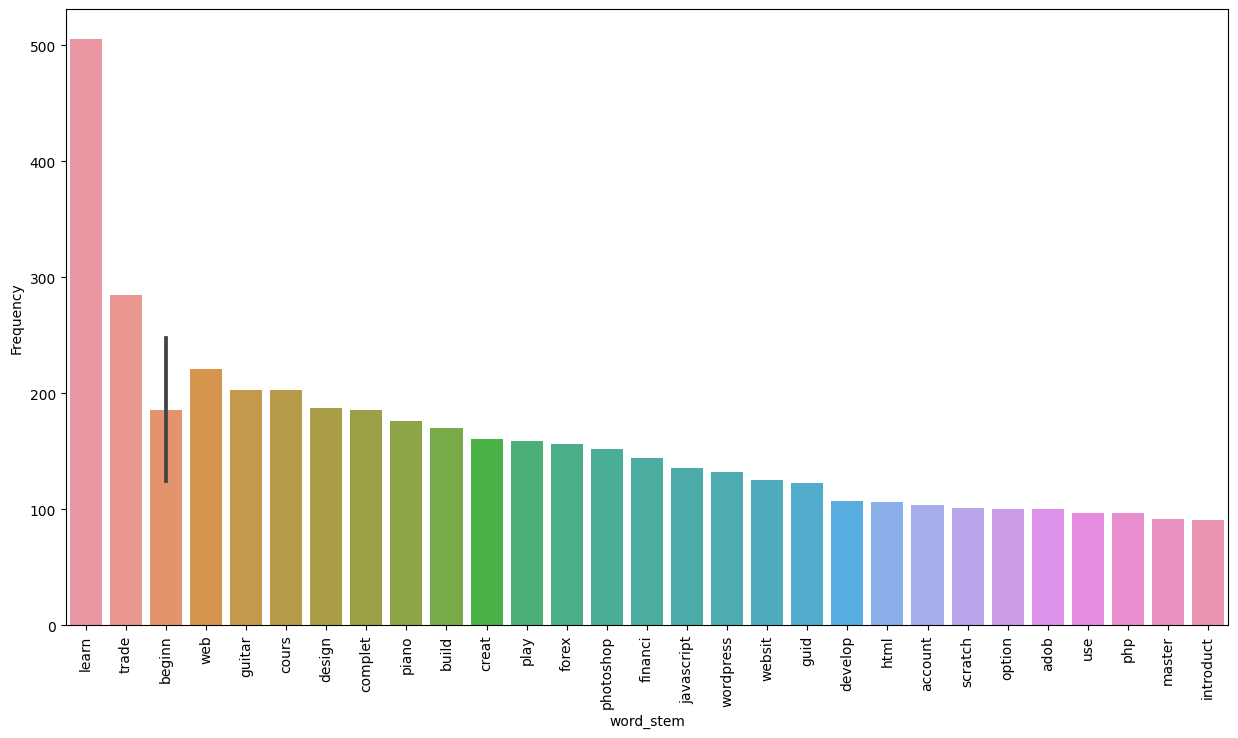

In [546]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

Graficar nube de palabras

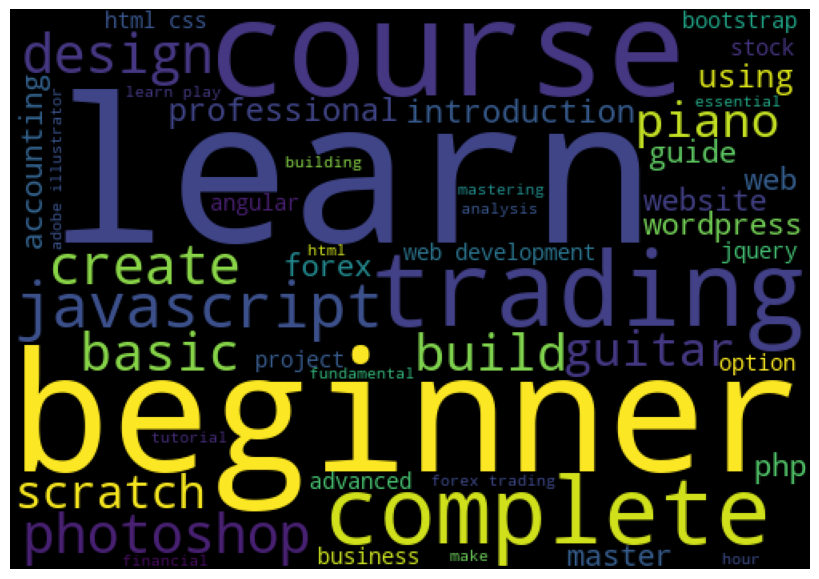

In [547]:
text = " ".join(token1)

wordcloud = WordCloud(background_color="black", min_font_size=8, width=500,
                      height=350).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Creamos una tabla dimension

In [622]:
df_udemy = pd.read_csv(r'Datasets\udemy.csv')

In [623]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


Eliminar duplicados

In [624]:
df_udemy.duplicated().sum()

6

In [626]:
df_udemy.drop_duplicates(inplace=True)

In [627]:
def convetFunction(column):
    """Función para convertir columna cualitativa en cuantitativa y crear un archivo cvs

    Args:
        column (str): Columna a convertir
    """
    object_list = df_udemy[column].unique()
    object_dict = {key:index for index, key in enumerate(object_list)}
    df = pd.DataFrame(object_list)
    df.rename(columns={0:column}, inplace=True)
    df.index.rename(name=r'{column}_id', inplace=True)
    df_udemy.replace({column: object_dict}, inplace=True)
    df_udemy.rename(columns = {'column': r'{column}_id'}, inplace=True)
    df.to_csv(r'C:\Users\cacer\OneDrive\Escritorio\PI02-MOOCs\Dashboard\{column}.csv')


Crear un dataframe para los títulos de los cursos

In [628]:
df_cursos = df_udemy[['course_id', 'course_title']]

In [629]:
df_cursos.set_index('course_id')

,course_title
course_id,
1070968,Ultimate Investment Banking Course
1113822,Complete GST Course & Certification - Grow You...
1006314,Financial Modeling for Business Analysts and C...
1210588,Beginner to Pro - Financial Analysis in Excel ...
1011058,How To Maximize Your Profits Trading Options
...,...
775618,Learn jQuery from Scratch - Master of JavaScri...
1088178,How To Design A WordPress Website With No Codi...
635248,Learn and Build using Polymer


In [630]:
df_cursos['course_title'] = df_cursos['course_title'].str.replace(',', ';')

C:\Users\cacer\AppData\Local\Temp\ipykernel_2432\2922082398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cursos['course_title'] = df_cursos['course_title'].str.replace(',', ';')


In [615]:
df_cursos.to_csv(r'C:\Users\cacer\OneDrive\Escritorio\PI02-MOOCs\Dashboard\cursos.csv', index=False)

In [616]:
df_udemy.drop(columns='course_title', axis=1, inplace=True)

In [617]:
df_udemy.drop(columns='url', axis=1, inplace=True)

Creamos un archivo csv por separado para eliminar la columna cualitativa del dataframe

In [621]:
convetFunction('level')

In [560]:
convetFunction('is_paid')

In [561]:
convetFunction('subject')

In [562]:
convetFunction('language')

Reemplazar valores para convertirlos en float

In [563]:
df_udemy.loc[df_udemy['rating'] == 'NoData', 'rating'] = '0'

In [564]:
df_udemy['rating'] = df_udemy['rating'].str.replace(',', '.')

In [565]:
df_udemy['rating'] = df_udemy['rating'].astype(float)

In [566]:
df_udemy['rating'].head(10)

0    3.6
1    4.5
2    4.2
3    4.5
4    4.8
5    0.0
6    4.5
7    4.8
8    0.0
9    3.7
Name: rating, dtype: float64

Convertir columna a columna Date

In [567]:
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp']).dt.date

In [568]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   is_paid              3672 non-null   int64  
 2   price                3672 non-null   int64  
 3   num_subscribers      3672 non-null   int64  
 4   num_reviews          3672 non-null   int64  
 5   num_lectures         3672 non-null   int64  
 6   level                3672 non-null   int64  
 7   content_duration     3672 non-null   float64
 8   published_timestamp  3672 non-null   object 
 9   subject              3672 non-null   int64  
 10  language             3672 non-null   int64  
 11  rating               3672 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 372.9+ KB


In [569]:
df_udemy.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,0,200,2147,23,51,0,1.5,2017-01-18,0,0,3.6
1,1113822,0,75,2792,923,274,0,39.0,2017-03-09,0,0,4.5
2,1006314,0,45,2174,74,51,1,2.5,2016-12-19,0,0,4.2
3,1210588,0,95,2451,11,36,0,3.0,2017-05-30,0,0,4.5
4,1011058,0,200,1276,45,26,1,2.0,2016-12-13,0,0,4.8


In [570]:
df_udemy.rename(columns={'is_paid': 'is_paid_id', 'level': 'level_id', 'subject': 'subject_id', 'language': 'language_id'},inplace=True)

En este punto, existe un dataframe de dimensión.

In [571]:
df_udemy.to_csv(r'Dashboard/udemy.csv', index=False)

In [572]:
df_aux = df_udemy.copy()

Crear un mapa de calor

Aquí se puede ver la relación entre variables.
n_lectures está fuertemente relacionado con content_duration.
num_subscribers tiene una correlación con num_reviews.
el precio tiene una pequeña relación con content_duration y num_lecturers.
Otras variables tienen una baja correlación entre ellas.

C:\Users\cacer\AppData\Local\Temp\ipykernel_2432\1382362276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_aux.corr()


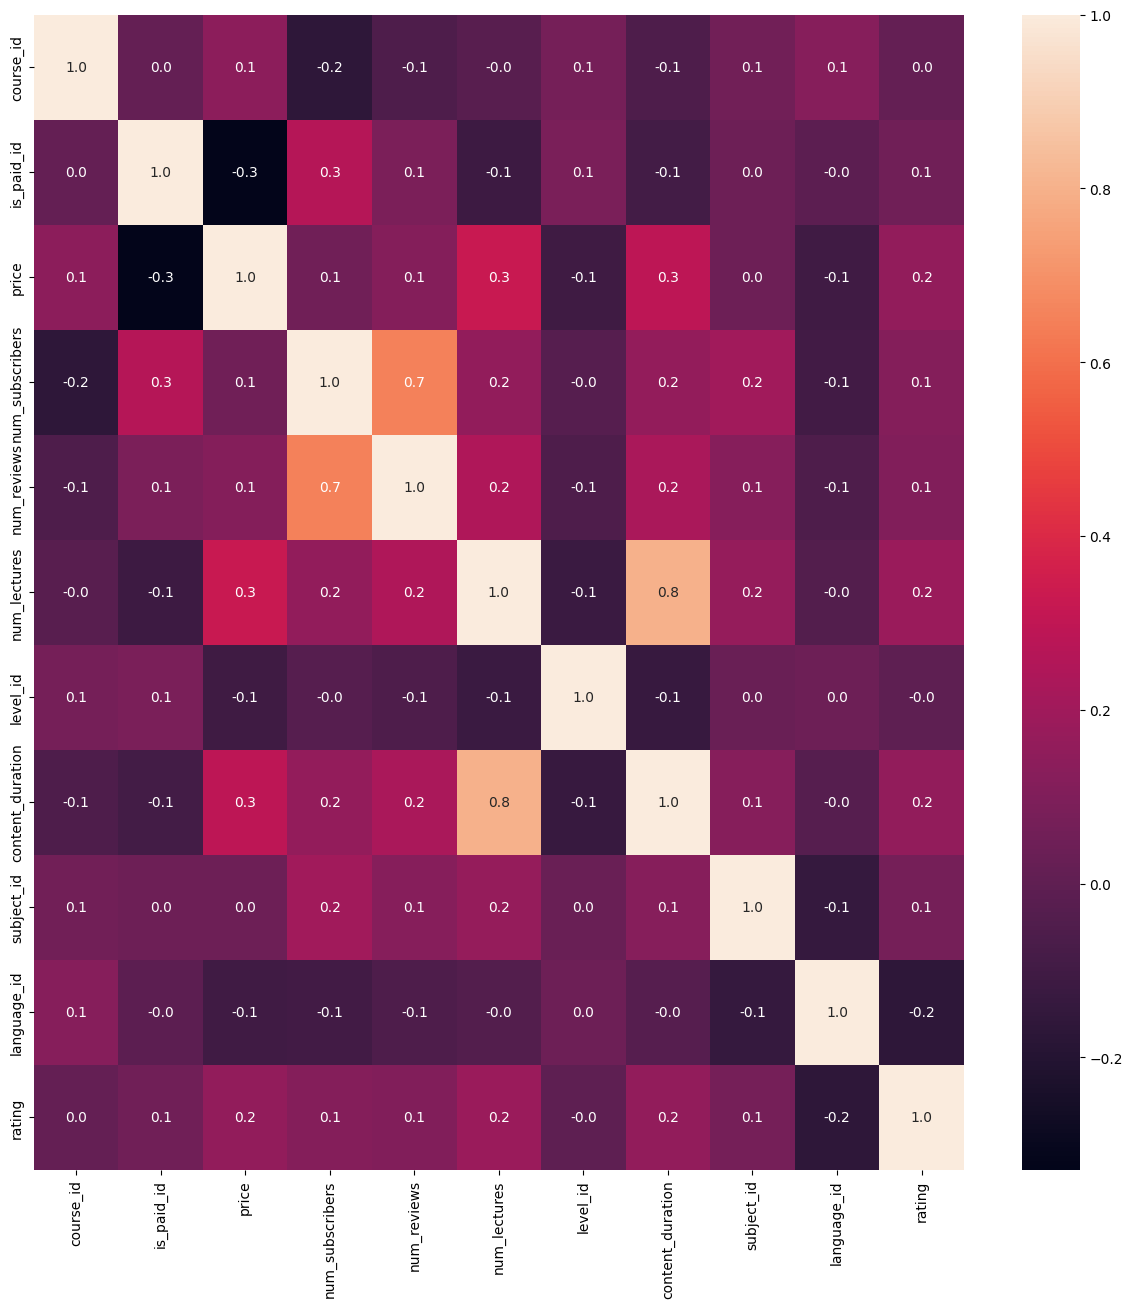

In [573]:
corr = df_aux.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        fmt= '.1f',annot_kws={'size': 10},
        annot=True);